# Vehicle dataset from cardekho
This dataset contains information about used cars listed on www.cardekho.com  
Kaggle: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [1]:
import numpy as np
import pandas as pd

In [2]:
DATASET_PATH = 'datasets/CAR_DETAILS_FROM_CAR_DEKHO.csv'
PREPARED_DATASET_PATH = 'datasets/CAR_DETAILS_FROM_CAR_DEKHO_prepared.csv'

##### Dataset's columns:  
1. name - Name of the cars
2. year - Year of the car when it was bought
3. selling_Price - Price at which the car is being sold
4. km_driven - Number of Kilometres the car is driven
6. fuel - Fuel type of car (petrol / diesel / CNG / LPG / electric)
7. seller_type - Tells if a Seller is Individual or a Dealer
8. transmission - Gear transmission of the car (Automatic/Manual)
9. owner - Number of previous owners of the car

Load dataset into dataframe

### Load the data

In [3]:
df = pd.read_csv(DATASET_PATH)

In [4]:
df.shape

(4340, 8)

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Convert "fuel", "seller_type", "transmission" & "owner" to binary data

In [8]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Save the results

In [9]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

### Visualize the data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [12]:
title_font = {
    "fontsize": 16,
    "fontweight": "bold",
    "color": "darkgrey",
    "family": "Arial",
}

lable_font = {
    "fontsize": 12,
    "color": "darkgrey",
    "family": "Arial",
}

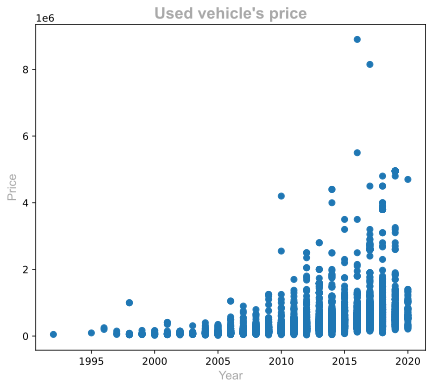

In [13]:
plt.figure(figsize=(7, 6))
plt.scatter(df['year'], df['selling_price'])

plt.title('Used vehicle\'s price', fontdict=title_font)
plt.xlabel('Year', fontdict=lable_font)
plt.ylabel('Price', fontdict=lable_font)

plt.show()

In [14]:
#sns.pairplot(df)

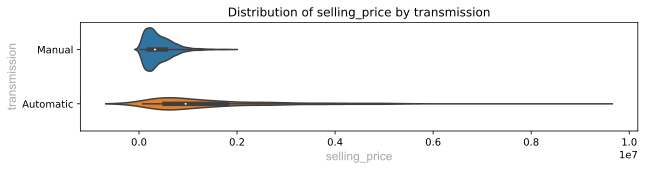

In [15]:
plt.figure(figsize=(10, 2))

sns.violinplot(df['selling_price'], df['transmission'])

plt.title('Distribution of selling_price by transmission')
plt.xlabel('selling_price', fontdict=lable_font)
plt.ylabel('transmission', fontdict=lable_font)

plt.show()

###  Drop outliers

In [16]:
df = df.loc[df['km_driven'] <= 40000]

In [17]:
df = df.loc[df['selling_price'] <= 400000]

In [18]:
df = df.loc[df['year'] >= 1995]

In [19]:
df.describe()

,year,selling_price,km_driven
count,525.000000,525.000000,525.000000
mean,2013.851429,254390.815238,26778.396190
std,4.153636,96806.816457,10531.839843
min,1996.000000,20000.000000,1.000000
25%,2012.000000,200000.000000,20000.000000
50%,2015.000000,270000.000000,28942.000000
75%,2017.000000,325000.000000,35000.000000
max,2020.000000,400000.000000,40000.000000


In [20]:
#sns.pairplot(df[['year', 'selling_price', 'km_driven']])

### Change `object` data into `dummies`

In [21]:
df_dummies = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'])
df_dummies.shape

(525, 17)

In [22]:
df_dummies.drop(['name', 'year', 'selling_price', 'km_driven'], axis='columns', inplace=True)
df_dummies

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
10,0,0,0,1,0,1,0,0,1,1,0,0,0
23,0,0,0,1,0,1,0,0,1,1,0,0,0
28,0,1,0,0,0,1,0,0,1,0,0,1,0
57,0,0,0,1,1,0,0,0,1,1,0,0,0
61,0,1,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,0,1,0,0,0,1,0,0,1,0,0,1,0
4308,0,0,0,1,0,1,0,0,1,1,0,0,0
4309,0,0,0,1,1,0,0,0,1,1,0,0,0
4324,0,0,0,1,0,1,0,0,1,1,0,0,0


In [23]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 10 to 4339
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   fuel_CNG                      525 non-null    uint8
 1   fuel_Diesel                   525 non-null    uint8
 2   fuel_LPG                      525 non-null    uint8
 3   fuel_Petrol                   525 non-null    uint8
 4   seller_type_Dealer            525 non-null    uint8
 5   seller_type_Individual        525 non-null    uint8
 6   seller_type_Trustmark Dealer  525 non-null    uint8
 7   transmission_Automatic        525 non-null    uint8
 8   transmission_Manual           525 non-null    uint8
 9   owner_First Owner             525 non-null    uint8
 10  owner_Fourth & Above Owner    525 non-null    uint8
 11  owner_Second Owner            525 non-null    uint8
 12  owner_Third Owner             525 non-null    uint8
dtypes: uint8(13)
memory usage: 10.8 K

In [24]:
df = pd.concat([df, df_dummies], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 10 to 4339
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   name                          525 non-null    object
 1   year                          525 non-null    int64 
 2   selling_price                 525 non-null    int64 
 3   km_driven                     525 non-null    int64 
 4   fuel                          525 non-null    object
 5   seller_type                   525 non-null    object
 6   transmission                  525 non-null    object
 7   owner                         525 non-null    object
 8   fuel_CNG                      525 non-null    uint8 
 9   fuel_Diesel                   525 non-null    uint8 
 10  fuel_LPG                      525 non-null    uint8 
 11  fuel_Petrol                   525 non-null    uint8 
 12  seller_type_Dealer            525 non-null    uint8 
 13  seller_type_Indivi

In [25]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

## Teach a linear regression model

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
df.dtypes

name                            object
year                             int64
selling_price                    int64
km_driven                        int64
fuel                            object
seller_type                     object
transmission                    object
owner                           object
fuel_CNG                         uint8
fuel_Diesel                      uint8
fuel_LPG                         uint8
fuel_Petrol                      uint8
seller_type_Dealer               uint8
seller_type_Individual           uint8
seller_type_Trustmark Dealer     uint8
transmission_Automatic           uint8
transmission_Manual              uint8
owner_First Owner                uint8
owner_Fourth & Above Owner       uint8
owner_Second Owner               uint8
owner_Third Owner                uint8
dtype: object

In [28]:
df_prepared = df.select_dtypes(include=['int64', 'uint8'])

In [29]:
df_prepared.head()

,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
10,2015,260000,35000,0,0,0,1,0,1,0,0,1,1,0,0,0
23,2015,260000,35000,0,0,0,1,0,1,0,0,1,1,0,0,0
28,2013,390000,33000,0,1,0,0,0,1,0,0,1,0,0,1,0
57,2018,310000,28000,0,0,0,1,1,0,0,0,1,1,0,0,0
61,1996,250000,35000,0,1,0,0,0,1,0,0,1,0,0,1,0


#### Split dataframe on X & y

In [30]:
X = df_prepared.loc[:, df_prepared.columns != 'selling_price']

In [31]:
X.describe()

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,2013.851429,26778.396190,0.003810,0.087619,0.003810,0.904762,0.190476,0.807619,0.001905,0.045714,0.954286,0.775238,0.009524,0.192381,0.022857
std,4.153636,10531.839843,0.061662,0.283010,0.061662,0.293823,0.393051,0.394547,0.043644,0.209064,0.209064,0.417824,0.097217,0.394547,0.149590
min,1996.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,20000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2015.000000,28942.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2017.000000,35000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2020.000000,40000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
X.head()

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
10,2015,35000,0,0,0,1,0,1,0,0,1,1,0,0,0
23,2015,35000,0,0,0,1,0,1,0,0,1,1,0,0,0
28,2013,33000,0,1,0,0,0,1,0,0,1,0,0,1,0
57,2018,28000,0,0,0,1,1,0,0,0,1,1,0,0,0
61,1996,35000,0,1,0,0,0,1,0,0,1,0,0,1,0


In [33]:
y = df_prepared.loc[:, df_prepared.columns == 'selling_price']
y.head()

,selling_price
10,260000
23,260000
28,390000
57,310000
61,250000


#### Split X & y on train and test

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [37]:
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(X_test)

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_test, y_pred)

0.45590168259995467

## Random forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 150, 200],
    'max_features': np.arange(5, 9),
    'max_depth': np.arange(5, 10),
}

clf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    scoring='accuracy',
    cv=5,
)

In [46]:
rfr = RandomForestRegressor()

In [47]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
y_pred = rfr.predict(X_test)

In [49]:
r2_score(y_test, y_pred)

0.3705909555358249